<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/epacuit/introduction-machine-learning/blob/main/classification/example-classifying-digits.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(classifying-digits)=
# Example: Classifying Digits

This is in the initial example discussed in the book "Deep Learning with Python" by François Chollet.

The MNIST dataset is a set of handwritten digits. It has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.


## Step 1: Load the data

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_data` and `test_data`: lists of images of handwritten digits.

`train_labels` and `test_labels`: The label associated with an example is the digit 0-9.

In [2]:
digit_idx = 0
print(train_images[digit_idx])
print(train_labels[digit_idx])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

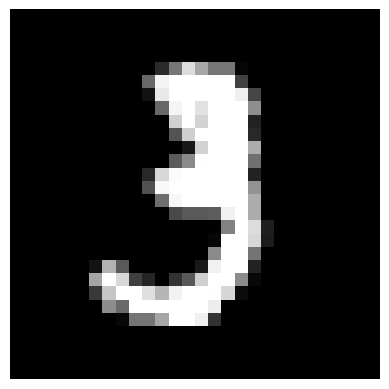

The label is 3


In [3]:
# display images
import matplotlib.pyplot as plt
import numpy as np

def display_image(image):
    plt.imshow(np.reshape(image, (28,28)), cmap='gray')
    plt.axis('off')
    plt.show()

digit_idx = 10
display_image(train_images[digit_idx])
print(f"The label is {train_labels[digit_idx]}")

## Step 2: Preprocess the data

We reshape the data into the shape that the network expects, and scale it so that all values are in the `[0, 1]` interval.

* Reshaping flattens images so they can be inputted to standard neural networks.
* Normalizing converts pixel values from `[0,255]` to `[0,1]` to aid neural network training.
* Converting to `float32` ensures the model works with precise fractional numbers.



In [4]:

train_images = train_images.reshape((60000, 28*28)) 
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [5]:

print(len(train_images[0]))

784


## Define the Model

`sparse_categorical_crossentropy` is a loss function used for multi-class classification problems when the labels are *integers* rather than *one-hot vectors*.

It's essentially identical to `categorical_crossentropy`, except it simplifies label handling by not requiring explicit one-hot encoding.


In [6]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense

model = keras.Sequential([
    Dense(64, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='rmsprop', 
    loss = 'sparse_categorical_crossentropy', 
    metrics=["accuracy"])


2025-04-29 07:31:20.059849: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2025-04-29 07:31:20.059874: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2025-04-29 07:31:20.059877: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
I0000 00:00:1745926280.059888 15652705 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1745926280.059907 15652705 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Step 4: Train the model


We will train the model for 20 epochs in mini-batches of 512 samples.

In [7]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=0)


2025-04-29 07:31:20.337668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


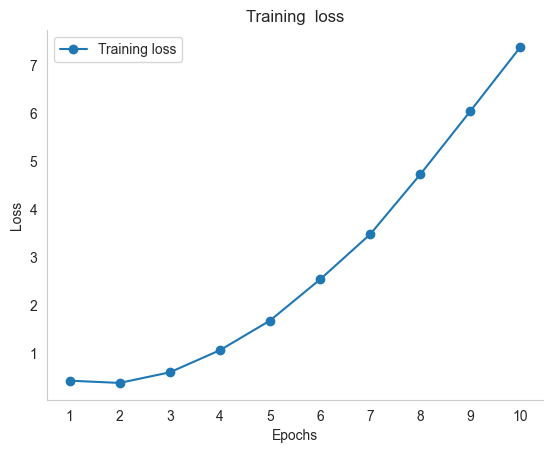

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("whitegrid")
history_dict = history.history

loss_values = history_dict["loss"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, "o-", label="Training loss") 
plt.title("Training  loss") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

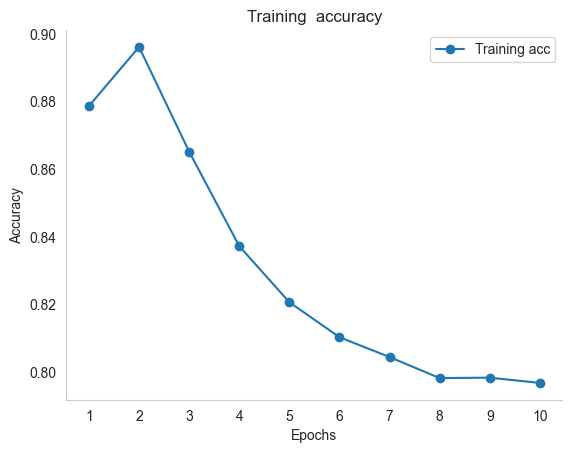

In [9]:
acc = history_dict["accuracy"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, acc, "o-", label="Training acc")
plt.title("Training  accuracy") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Accuracy") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

In [10]:
results = model.evaluate(test_images, test_labels)

print(f"The test loss is {results[0]}")
print(f"The test accuracy is {results[1]}")
print("The predictions are:")   
predictions = model.predict(test_images)
print(predictions)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.8438 - loss: 8.9692

 11/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8272 - loss: 7.5733   

 23/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8136 - loss: 7.6920

 35/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8080 - loss: 7.6283

 47/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8027 - loss: 7.6237

 59/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7991 - loss: 7.6154

 73/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7954 - loss: 7.6875

 86/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7930 - loss: 7.7843

 99/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7914 - loss: 7.8555

112/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7907 - loss: 7.8940

125/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7901 - loss: 7.9237

138/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7895 - loss: 7.9483

151/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7890 - loss: 7.9717

164/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7888 - loss: 7.9771

178/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7889 - loss: 7.9679

191/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7893 - loss: 7.9605

204/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7900 - loss: 7.9486

217/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7907 - loss: 7.9319

230/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7915 - loss: 7.9103

243/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7922 - loss: 7.8812

255/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7928 - loss: 7.8614

267/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7934 - loss: 7.8368

279/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7941 - loss: 7.8096

292/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7950 - loss: 7.7760

305/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7959 - loss: 7.7396

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7964 - loss: 7.7215

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7964 - loss: 7.7194


The test loss is 7.074764251708984
The test accuracy is 0.8141000270843506
The predictions are:


  1/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step

 38/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

 81/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

125/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

168/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

214/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

264/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.6566659e-37 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  6.6318008e-37 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.1225002e-15 ... 8.4561388e-20
  3.3917756e-26 1.3325976e-34]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.1637555e-08
  2.2047625e-28 6.8201162e-14]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
